# Notebook to plot Watt Fission Spectrum and results of Rutte et al. 2019


In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import os 
import pandas as pd

In [3]:
energy2  = np.array([1e6, 1e6, 1.5e6, 2e6,2.3e6,2.5e6,   
 2.75e6, 3e6, 3.25e6, 3.5e6, 3.7e6,4e6, 5e6, 6e6,      
 7e6,8e6, 9e6, 1.1e7, 1.4e7, 1.6e7, 2e7])

barns2 = np.array([0, 0.00782209, 0.0385682, 0.106612, 0.154483,    
0.187862, 0.225633, 0.258665, 0.283311, 0.286437, 0.296088, 0.30414,     
0.320064,0.334395,0.340764, 0.355096, 0.363057, 0.375796, 0.38535,     
0.388535,0.388535])

In [4]:
# (n,p) data
# Rutte et al
energy_rut = np.array([2.75, 2.589, 2.613, 2.542, 2.431, 2.382])
energy_rut_err = np.array([0.02,0.011, 0.024, 0.0007, 0.017, 0.007])
barns_rut = np.array([177, 108, 130, 191, 512, 399])
barns_rut_err = np.array([7, 4, 5, 7, 19, 15])

In [5]:
# Rutte et al - Licorne
energy_li = np.array([2.96, 1.46, 1.54, 1.94])
energy_li_err = np.array([0.19, 0.15, 0.36, 0.33])
barns_li = np.array([249, 44, 23, 112])
barns_li_err = np.array([9, 2, 1, 4])

In [6]:
def Watt_fiss(a, b, en):

    f = np.exp(-en/a)*np.sinh(np.sqrt(b*en))
    return f

In [7]:
en = np.random.uniform(0, 20, 10000)
q = Watt_fiss(0.5, 1, en)

In [8]:
print(q.min(), q.max())

1.8602079483529333e-16 0.31662185243305446


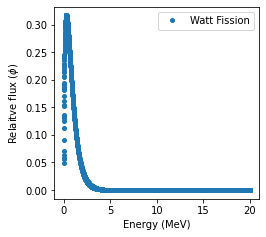

In [9]:
plt.figure(figsize= (3.8, 3.4))
plt.plot(en,q, 'o', ms = 4, 
        label = 'Watt Fission')
plt.ylabel('Relaitve flux ($\phi$)')
plt.xlabel('Energy (MeV)')
plt.legend()
plt.tight_layout()
#plt.yscale('log')
#plt.xscale('log')
#plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Supplement/Watt_Fission.pdf')

In [13]:
def watt_sampler(a, b): 
    n = 1000
    energy = np.zeros(n)
    K = 1 + (b/8*a); 
    LL= (K+ np.sqrt(K*K -1))/a
    for i in range(n):
        xx = -np.log(np.random.uniform(i))
    energy = LL* xx[i]
    return energy

In [14]:
a = 0.7
b = 1.3

n = 100000
energy1a = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy1a[i] = LL* xx
    


In [15]:
a = 0.6
b = 1.3

n = 100000
energy2a = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy2a[i] = LL* xx

In [16]:
a = 0.5
b = 1.3

n = 100000
energy3a = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy3a[i] = LL* xx
    


In [17]:
a = 0.4
b = 1.3

n = 100000
energy4a = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy4a[i] = LL* xx
    

In [18]:
a = 0.5
b = 3

n = 100000
energy5a = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy5a[i] = LL* xx

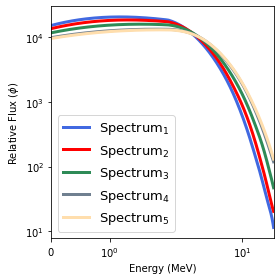

In [19]:
from scipy.stats import gaussian_kde
grid = np.linspace(0, 20, 1000)

kde_watt = gaussian_kde(energy1a, bw_method = 0.5)
kde_watt2 = gaussian_kde(energy2a, bw_method = 0.5)
kde_watt3 = gaussian_kde(energy3a, bw_method = 0.5)
kde_watt4 = gaussian_kde(energy4a, bw_method = 0.5)
kde_watt5 = gaussian_kde(energy5a, bw_method = 0.5)


kde_plot_watt = kde_watt.evaluate(grid)
kde_plot_watt2 = kde_watt2.evaluate(grid)
kde_plot_watt3 = kde_watt3.evaluate(grid)
kde_plot_watt4 = kde_watt4.evaluate(grid)
kde_plot_watt5 = kde_watt5.evaluate(grid)


plt.figure(figsize = (4,4))
plt.plot(grid, kde_plot_watt*100000, lw = 3, 
        color = 'RoyalBlue', 
        label = 'Spectrum$_{1}$'); 

plt.plot(grid, kde_plot_watt2*100000, lw = 3, 
        color = 'r', 
        label = 'Spectrum$_{2}$'); 

plt.plot(grid, kde_plot_watt3*100000, lw = 3, 
        color = 'seagreen', 
        label = 'Spectrum$_{3}$'); 

plt.plot(grid, kde_plot_watt4*100000, lw = 3, 
        color = 'slategrey', 
        label = 'Spectrum$_{4}$'); 

plt.plot(grid, kde_plot_watt5*100000, lw = 3, 
        color = 'navajowhite', 
        label = 'Spectrum$_{5}$'); 

plt.ylabel('Relative Flux ($\phi$)')
plt.xlabel('Energy (MeV)'); 
plt.legend(fontsize = 13);
plt.xlim(0, 20);
plt.yscale('symlog');
plt.xscale('symlog');
plt.tight_layout()


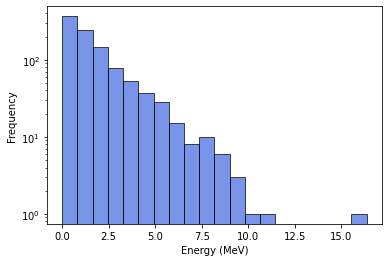

In [20]:
a = 1
b = 1.18

n = 1000
energy = np.zeros(n)
K = 1 + (b/8*a); 
LL= (K+ np.sqrt(K*K -1))/a
for i in range(n):
    xx = -np.log(np.random.uniform())
    energy[i] = LL* xx
    
grid = np.linspace(0, 20, 1000)

kde_watt = gaussian_kde(energy, bw_method = 0.5)
    
plt.hist(energy, edgecolor = 'k', 
        facecolor = 'RoyalBlue', 
        alpha = 0.7, 
        bins = 20);
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency')
plt.yscale('log')

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

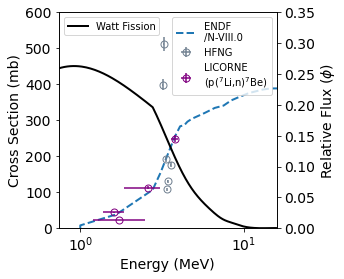

In [22]:
fig,ax = plt.subplots(1,1,figsize = (5,4.1))
ax.plot(energy2/1e6, barns2*1e3, 
        label = 'ENDF\n/N-VIII.0', 
        ls = '--', lw  = 2);
ax.errorbar(energy_rut, barns_rut, 
             xerr = energy_rut_err,
             yerr = barns_rut_err, fmt= 'o', 
            color= 'slategrey', 
             label = 'HFNG', 
            ms = 7, 
            markerfacecolor= 'None', 
            markeredgecolor = 'slategrey')


ax.errorbar(energy_li, barns_li, 
             xerr = energy_li_err,
             yerr = barns_li_err, fmt= 'o', 
            markerfacecolor= 'None', 
            markeredgecolor = 'purple',
             label = 'LICORNE\n(p($^{7}$Li,n)$^{7}$Be)', 
            ms = 7, 
            color = 'purple')


ax2 = ax.twinx()
ax2.plot(grid, kde_watt.evaluate(grid), lw = 2, 
        color = 'k', 
        label = 'Watt Fission'); 
#ax2.plot(grid, zz)
ax2.set_ylabel('Relative Flux ($\phi$)')



plt.xscale('log')
#plt.yscale('log')
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Cross Section (mb)')
ax.legend(fontsize = 10, loc = 1)
ax2.legend(fontsize = 10, loc = 2)
ax.set_xscale('symlog')
plt.xlim(0.7, 18); 
ax.set_ylim(0, 600);
ax2.set_ylim(0, 0.35);

plt.tight_layout()


In [23]:
kde_barns = gaussian_kde(barns2*1e3, bw_method = 1)
kde_barns_grid = kde_barns.evaluate(grid)

In [24]:
zz = kde_barns_grid *kde_watt.evaluate(grid); 

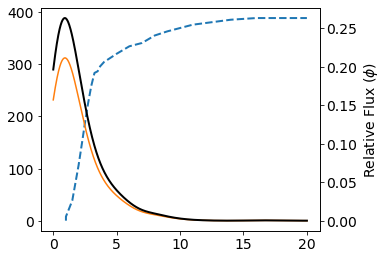

In [25]:
fig,ax = plt.subplots(1,1,figsize = (5,4.1))
ax.plot(energy2/1e6, barns2*1e3, 
        label = 'ENDF\n/N-VIII.0', 
        ls = '--', lw  = 2);
ax2 = ax.twinx()
ax2.plot(grid, kde_watt.evaluate(grid), lw = 2, 
        color = 'k', 
        label = 'Watt Fission'); 
#ax2.plot(grid, zz)
ax2.set_ylabel('Relative Flux ($\phi$)')
ax.plot(grid, zz*1.5e6)

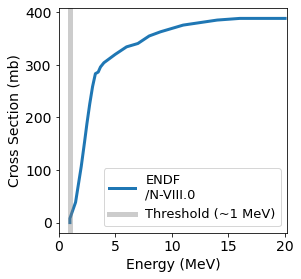

In [26]:
fig,ax = plt.subplots(1,1,figsize = (4.4,4.1))
ax.plot(energy2/1e6, barns2*1e3, 
        label = 'ENDF\n/N-VIII.0', 
        ls = '-', lw  = 3);

ax.axvline(1, label = 'Threshold (~1 MeV)', color ='gray', lw = 5,
          alpha = 0.4)

#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('Cross Section (mb)')
ax.legend(fontsize = 13, loc = 4)
#ax.set_xscale('symlog')
ax.locator_params(axis = 'x', nbins = 6)
ax.set_xlim(0, 20.2)

plt.tight_layout()
